Epoch:  1
[-0.00670805]
Objective function:  -0.6085497134279696
Theta0:  [999.99999999]
Theta1:  [-1.0049586e-05]
Theta2:  [-1.01176297e-05]
Theta3:  [-9.71328858e-06]
Theta4:  [-0.00019901]
Theta5:  [-0.00598241]
Theta_sigma:  [250.00002649]
Steps taken:  100


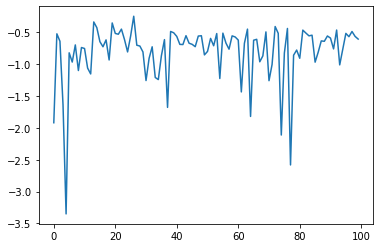

Epoch:  1
[-0.00731829]
Objective function:  -0.48351026048529816
Theta0:  [999.99999997]
Theta1:  [-1.00757832e-05]
Theta2:  [-1.00351929e-05]
Theta3:  [-9.46901792e-06]
Theta4:  [-0.00025117]
Theta5:  [-0.00699903]
Theta_sigma:  [249.99997751]
Steps taken:  200


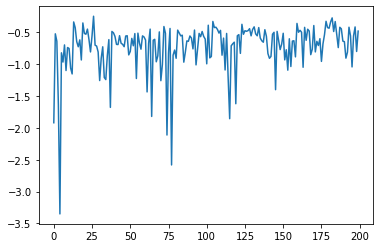

Epoch:  1
[-0.00875246]
Objective function:  -0.5151278649188731
Theta0:  [999.99999996]
Theta1:  [-1.00913653e-05]
Theta2:  [-1.01672957e-05]
Theta3:  [-1.23927971e-05]
Theta4:  [-0.00032655]
Theta5:  [-0.00901876]
Theta_sigma:  [249.99997782]
Steps taken:  300


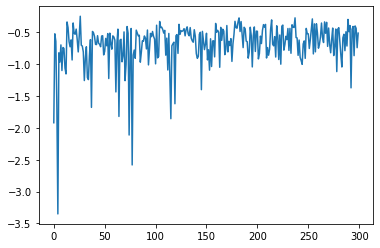

Epoch:  1
[-0.00661519]
Objective function:  -0.6097262856499591
Theta0:  [999.99999994]
Theta1:  [-1.01562132e-05]
Theta2:  [-1.01462948e-05]
Theta3:  [-8.10792593e-06]
Theta4:  [-0.00022402]
Theta5:  [-0.00680883]
Theta_sigma:  [249.99996537]
Steps taken:  400


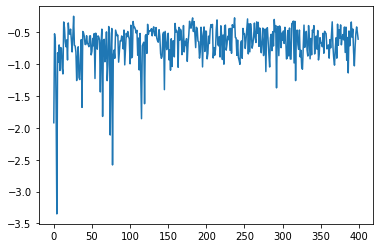

Epoch:  1
[-0.00819239]
Objective function:  -0.9119372744646957
Theta0:  [999.99999994]
Theta1:  [-1.01503768e-05]
Theta2:  [-1.02312146e-05]
Theta3:  [-1.06335095e-05]
Theta4:  [-0.00028736]
Theta5:  [-0.00839475]
Theta_sigma:  [249.99993583]
Steps taken:  500


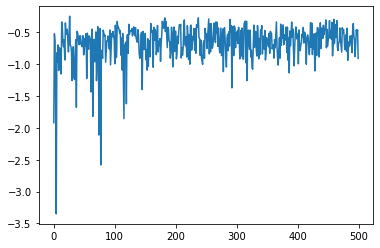

Epoch:  1
[-0.00959176]
Objective function:  -0.4924423942762282
Theta0:  [999.99999994]
Theta1:  [-1.01536506e-05]
Theta2:  [-1.03355563e-05]
Theta3:  [-1.28659033e-05]
Theta4:  [-0.00034179]
Theta5:  [-0.00982056]
Theta_sigma:  [249.99992286]
Steps taken:  600


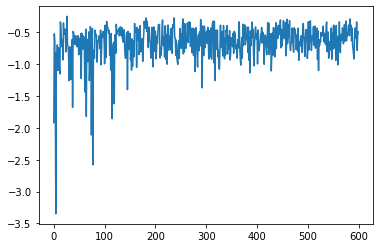

Epoch:  1
[-0.01032444]
Objective function:  -0.45176121588960144
Theta0:  [999.99999994]
Theta1:  [-1.01563397e-05]
Theta2:  [-1.03875194e-05]
Theta3:  [-1.40155833e-05]
Theta4:  [-0.00036958]
Theta5:  [-0.01052591]
Theta_sigma:  [249.99997894]
Steps taken:  700


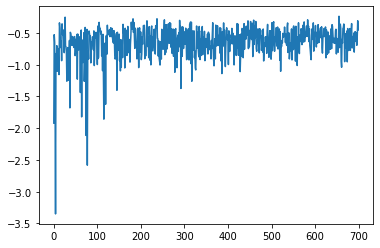

Epoch:  1
[-0.00884742]
Objective function:  -0.44923856847162397
Theta0:  [999.99999994]
Theta1:  [-1.01562801e-05]
Theta2:  [-1.04289039e-05]
Theta3:  [-1.51924709e-05]
Theta4:  [-0.00040123]
Theta5:  [-0.0113835]
Theta_sigma:  [249.99995063]
Steps taken:  800


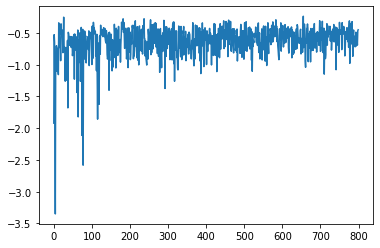

KeyboardInterrupt: 

In [1]:
resss = []
objecttt = []
import numpy as np
import scipy
from scipy import stats
from copy import deepcopy
import math
import random as rn
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

for epoch in range(100):
    global_max=0

    # Order Book for Hedging Class
    class LOB:   
        def __init__(self, midprice, volatility, perm_impact, spread, bp_distance):
            self.midprice = midprice
            self.volatility = volatility
            self.perm_impact = perm_impact
            self.spread = spread
            self.bp_distance = bp_distance

        def price_update(self, hedging_amount):
            dt_sec = 1
            random_bps = np.random.normal(0, self.volatility * np.sqrt(dt_sec/86400))
            psi = 0.1; eta = 1e-5; pmi = 0.005
            size = hedging_amount*dt_sec/86400
            cost = 1e-4*np.sign(hedging_amount) * (psi + eta * np.abs(hedging_amount))
            impact_bps = pmi*size
            dS = 1e-4 * (impact_bps + random_bps)
            self.midprice += dS
            return dS

        def market_impact(self, hedging_amount):      
            return hedging_amount/(10**6) * 0.5


    # Market-Maker Class
    class MarketMaker:
        def __init__(self, theta0, theta1, theta2, theta3, theta4, theta5, theta_sigma, inventory):
            self.theta0 = theta0
            self.theta1 = theta1
            self.theta2 = theta2
            self.theta3 = theta3
            self.theta4 = theta4
            self.theta5 = theta5
            self.theta_sigma = theta_sigma
            self.inventory = inventory

        def policy_output(self):
            sign=np.sign(self.inventory[0])
            mu = (self.theta0 + self.theta1 * abs(self.inventory[0])**(1/5) + self.theta2 * abs(self.inventory[0])**(2/5) \
                  + self.theta3 * abs(self.inventory[0])**(3/5) + self.theta4 * abs(self.inventory[0])**(4/5) \
                  + self.theta5 * abs(self.inventory[0]))*sign
            sigma = self.theta_sigma
            hedging_amount = np.random.normal(loc = mu, scale = sigma, size = 1)[0] 
            return hedging_amount

        def reward_output(self, market_impact, price_change, spread, volatility, mm_profit, hedging_amount): 
            reward = mm_profit + (self.inventory + hedging_amount) * price_change \
            - abs(self.inventory + hedging_amount) * volatility - abs(hedging_amount) * (spread * 0.5 + abs(market_impact))      
            return reward

    class Client_Trader():
        def __init__(self):
            self.nothing = 0

        def getAmount(self):
            amountsList = [1000000, 3000000, 5000000]
            p = [0.8,  0.15, 0.05]
            idx = np.random.choice(len(p), p=p)
            amount = np.array(rn.choice([-1,1]) * amountsList[idx])
            return np.array([float(amount)])
            
    def gradient_log(theta0, theta1, theta2, theta3, theta4, theta5, theta_sigma, inventory, hedging_amount): # sigma = theta2

        sign=np.sign(inventory)

        gr0 = sign * (hedging_amount - sign*(theta0 + theta1 * abs(inventory)**(1/5) + theta2 * abs(inventory)**(2/5) \
                          + theta3 * abs(inventory)**(3/5) + theta4 * abs(inventory)**(4/5) + theta5 * abs(inventory))) \
                   /(theta_sigma**2)
        gr1 = sign * abs(inventory)**(1/5) * (hedging_amount - sign*(theta0 + theta1 * abs(inventory)**(1/5) + theta2 * abs(inventory)**(2/5) \
                          + theta3 * abs(inventory)**(3/5) + theta4 * abs(inventory)**(4/5) + theta5 * abs(inventory))) \
                                   /(theta_sigma**2)
        gr2 = sign * abs(inventory)**(2/5) * (hedging_amount - sign*(theta0 + theta1 * abs(inventory)**(1/5) + theta2 * abs(inventory)**(2/5) \
                          + theta3 * abs(inventory)**(3/5) + theta4 * abs(inventory)**(4/5) + theta5 * abs(inventory))) \
                                   /(theta_sigma**2)
        gr3 = sign * abs(inventory)**(3/5) * (hedging_amount - sign*(theta0 + theta1 * abs(inventory)**(1/5) + theta2 * abs(inventory)**(2/5) \
                          + theta3 * abs(inventory)**(3/5) + theta4 * abs(inventory)**(4/5) + theta5 * abs(inventory))) \
                                   /(theta_sigma**2)
        gr4 = sign * abs(inventory)**(4/5) * (hedging_amount - sign*(theta0 + theta1 * abs(inventory)**(1/5) + theta2 * abs(inventory)**(2/5) \
                          + theta3 * abs(inventory)**(3/5) + theta4 * abs(inventory)**(4/5) + theta5 * abs(inventory))) \
                                   /(theta_sigma**2)
        gr5 = sign * abs(inventory) * (hedging_amount - sign*(theta0 + theta1 * abs(inventory)**(1/5) + theta2 * abs(inventory)**(2/5) \
                          + theta3 * abs(inventory)**(3/5) + theta4 * abs(inventory)**(4/5) + theta5 * abs(inventory))) \
                            /(theta_sigma**2)
        gr_sigma = -1/theta_sigma + (hedging_amount - sign*(theta0 + theta1 * abs(inventory)**(1/5) + theta2 * abs(inventory)**(2/5) \
                          + theta3 * abs(inventory)**(3/5) + theta4 * abs(inventory)**(4/5) + theta5 * abs(inventory))**2) \
                                      /(theta_sigma**3)
        return [gr0, gr1, gr2, gr3, gr4, gr5, gr_sigma]   

    midprice = 1
    perm_impact = 0.005
    bp_distance = 1/10000
    volatility = 50 * bp_distance
    spread = 5 * bp_distance
    theta0 = 1000
    theta1 = -0.00001
    theta2 = -0.00001
    theta3 = -0.00001
    theta4 = -0.00001
    theta5 = -0.0000015
    theta_sigma = 250
    inventory = 0
    hedging_amount = 0 

    # Initial parameters for training (subject to change):
    grad_J = [+np.inf, +np.inf, +np.inf, +np.inf, +np.inf, +np.inf, +np.inf] 
    norm_grad_J = (grad_J[0]**2 + grad_J[1]**2 + grad_J[2]**2 + grad_J[3]**2 + grad_J[4]**2 + \
                   grad_J[5]**2 + grad_J[6]**2)**0.5 
    time = 600
    alpha = 2**(-8)
    gamma = 0.995
    steps = 0
    objective_values = []
    residuals = []

    Order_book = LOB(midprice, volatility, perm_impact, spread, bp_distance)
    Client = Client_Trader()
    Market_Maker = MarketMaker(theta0, theta1, theta2, theta3, theta4, theta5, theta_sigma, inventory)

    while steps<1600:
        if steps != 0 and steps%200 == 0:
            alpha = alpha/2
        check = []
        states = [] 
        actions = [] 
        rewards = [] 
        Order_book.midprice = 1 
        Market_Maker.inventory = 0 
        mm_profit = 0 
        avg_price = 0 
        # Trajectory
        for i in range(time):    
            # LOB updates based on our previous actions
            price_delta = Order_book.price_update(hedging_amount) 

            # Client trades x
            x = Client.getAmount() 
            
            check.append(x)
            if Market_Maker.inventory > 0: 
                if x > 0: 
                    priceWithSpread = Order_book.midprice + (spread/2)
                    if x <= Market_Maker.inventory:
                        mm_profit = x * (priceWithSpread - avg_price)
                        Market_Maker.inventory -= x 
                    else:
                        mm_profit = Market_Maker.inventory * (priceWithSpread - avg_price)
                        Market_Maker.inventory -= x 
                        avg_price = deepcopy(priceWithSpread)
                else: 
                    mm_profit = 0
                    priceWithSpread = Order_book.midprice - (spread/2)
                    Market_Maker.inventory -= x 
                    avg_price = (avg_price * (Market_Maker.inventory-abs(x)) + deepcopy(priceWithSpread) * abs(x))/Market_Maker.inventory
            elif Market_Maker.inventory < 0: 
                if x < 0: 
                    priceWithSpread = Order_book.midprice - (spread/2)
                    if abs(x) <= abs(Market_Maker.inventory): 
                        mm_profit = x * (avg_price - priceWithSpread)
                        Market_Maker.inventory -= x 
                    else:
                        mm_profit = Market_Maker.inventory * (avg_price - priceWithSpread)
                        Market_Maker.inventory -= x 
                        avg_price = deepcopy(priceWithSpread)
                else: 
                    mm_profit = 0
                    priceWithSpread = Order_book.midprice + (spread/2)
                    Market_Maker.inventory -= x 
                    avg_price = (avg_price * abs(Market_Maker.inventory+x) + x * priceWithSpread)/abs(Market_Maker.inventory)    
            else: 
                if x < 0: 
                    avg_price = Order_book.midprice - (spread/2)
                if x > 0:
                    avg_price = Order_book.midprice + (spread/2)
                else:
                    avg_price = 0    
                Market_Maker.inventory -= x
                mm_profit = 0

            inventory = deepcopy(Market_Maker.inventory)
            hedging_amount = Market_Maker.policy_output() 
            mi = Order_book.market_impact(hedging_amount) 
            R = Market_Maker.reward_output(mi, price_delta, spread, volatility, mm_profit, hedging_amount)/(10**10)
            states.append(inventory)
            actions.append(hedging_amount)
            rewards.append(R)
            Market_Maker.inventory += hedging_amount

        if abs(sum(check)) > 100e6:
    
            continue
        
        G = []
        for i in range(len(rewards)): 
            g_k = 0
            for j in range(i, len(rewards)): 
                g_k += rewards[j] * gamma**(j - i)
            G.append(g_k[0])
        objective_values.append(sum(G))

        for i in range(len(G)):  
            delta = G[i] 
            temp = gradient_log(Market_Maker.theta0, Market_Maker.theta1, Market_Maker.theta2, Market_Maker.theta3 \
                                , Market_Maker.theta4, Market_Maker.theta5, Market_Maker.theta_sigma, states[i], actions[i])
            norm_temp=(temp[0]**2+temp[1]**2+temp[2]**2+temp[3]**2+temp[4]**2+temp[5]**2+temp[6]**2)**0.5
            Market_Maker.theta0 = Market_Maker.theta0 + alpha * (gamma**i) * delta * temp[0]/norm_temp
            Market_Maker.theta1 = min(0, Market_Maker.theta1 + alpha * (gamma**i) * delta * temp[1]/norm_temp)
            Market_Maker.theta2 = min(0, Market_Maker.theta2 + alpha * (gamma**i) * delta * temp[2]/norm_temp)
            Market_Maker.theta3 = min(0, Market_Maker.theta3 + alpha * (gamma**i) * delta * temp[3]/norm_temp)
            Market_Maker.theta4 = min(0, Market_Maker.theta4 + alpha * (gamma**i) * delta * temp[4]/norm_temp)
            Market_Maker.theta5 = min(0, Market_Maker.theta5 + alpha * (gamma**i) * delta * temp[5]/norm_temp)
            Market_Maker.theta_sigma = max(1, Market_Maker.theta_sigma + alpha * (gamma**i) * delta * temp[6]/norm_temp)
    
        steps += 1    
        if steps % 100 == 0:
            print('Epoch: ', epoch+1)
            print(actions[-1]/states[-1])
            print('Objective function: ', objective_values[-1])
            print('Theta0: ', Market_Maker.theta0)
            print('Theta1: ', Market_Maker.theta1)
            print('Theta2: ', Market_Maker.theta2)
            print('Theta3: ', Market_Maker.theta3)
            print('Theta4: ', Market_Maker.theta4)
            print('Theta5: ', Market_Maker.theta5)
            print('Theta_sigma: ', Market_Maker.theta_sigma)
            print('Steps taken: ', steps)
            plt.plot(range(steps), objective_values)
            plt.show()
            print('==============================================')
    objecttt.append(objective_values) # EXPORT AFTER SIMULATION

